<a href="https://colab.research.google.com/github/allen44/case-study-decision-tree/blob/main/Springboard_Decision_Tree_Specialty_Coffee_Case_Study_Tier_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

## 1b. Load data 

In [2]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv('https://raw.githubusercontent.com/allen44/case-study-decision-tree/main/data/RRDinerCoffeeData.csv')

## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [3]:
# Call head() on your data 
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [4]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [5]:
# Call info() on your data
coffeeData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


The `Gender` column would make more sense if it had a 'category' dtype.

The column `Decision` has quite a few null values. Also, this column woul dmake sense to have a boolean dtype.

In [6]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [7]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [8]:
# Make the relevant name changes to spent_week and spent_per_week.
coffeeData['spent_last_week'] = coffeeData.pop('spent_week')
coffeeData['spent_last_month'] = coffeeData.pop('spent_month')
coffeeData['salary'] = coffeeData.pop('SlrAY')

In [9]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'Distance', 'Online',
       'Decision', 'spent_last_week', 'spent_last_month', 'salary'],
      dtype='object')

In [10]:
# Let's have a closer look at the gender column. Its values need cleaning.
coffeeData['Gender'].value_counts()

Male      355
Female    340
f           1
FEMALE      1
M           1
male        1
F           1
female      1
MALE        1
Name: Gender, dtype: int64

In [11]:
# See the gender column's unique values 
coffeeData['Gender'].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [12]:
# Replace all alternate values for the Female entry with 'Female'
for entry in coffeeData['Gender'].unique():
  if entry[0] in ['F', 'f']:
    coffeeData['Gender'] = coffeeData['Gender'].replace(entry, 'Female')

In [13]:
# Check out the unique values for the 'gender' column
coffeeData['Gender'].unique() 

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [14]:
# Replace all alternate values with "Male"
for entry in coffeeData['Gender'].unique():
  if entry[0] in ['M', 'm']:
    coffeeData['Gender'] = coffeeData['Gender'].replace(entry, 'Male')

In [15]:
# Let's check the unique values of the column "gender"
coffeeData['Gender'].unique() 

array(['Female', 'Male'], dtype=object)

In [16]:
# Check out the unique values of the column 'Decision'
coffeeData['Decision'].unique()

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [17]:
# Replace 1.0 and 0.0 by 'YES' and 'NO'
coffeeData['Decision'] = coffeeData['Decision'].replace(1., 'YES')
coffeeData['Decision'] = coffeeData['Decision'].replace(0., 'NO')
 

In [18]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData['Decision'].unique() 

array(['YES', nan, 'NO'], dtype=object)

## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [19]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NoPrediction = coffeeData.dropna(axis=0).reset_index(drop=True)
NoPrediction.describe()

,Age,num_coffeeBags_per_year,Distance,Online,spent_last_week,spent_last_month,salary
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,5.102898,0.512658,32.592827,106.727848,44731.892405
std,13.604135,1.585211,3.354891,0.500368,15.758109,56.101085,25567.674430
min,16.000000,0.000000,0.003168,0.000000,0.000000,0.000000,3150.000000
25%,25.000000,1.000000,2.077965,0.000000,24.000000,60.000000,27284.250000
50%,29.000000,3.000000,4.832168,1.000000,35.000000,113.500000,42791.500000
75%,49.000000,4.000000,7.869086,1.000000,43.000000,150.000000,61621.750000
max,90.000000,5.000000,10.986203,1.000000,62.000000,210.000000,172658.000000


### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

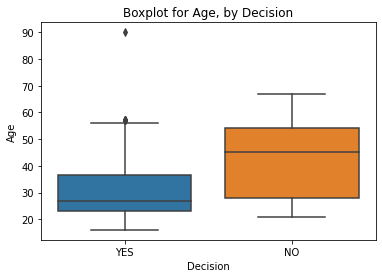

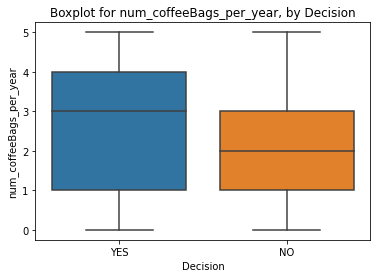

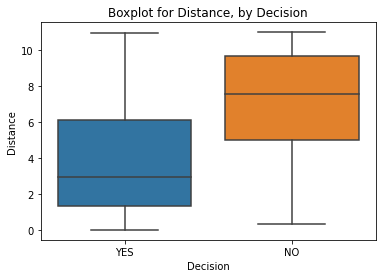

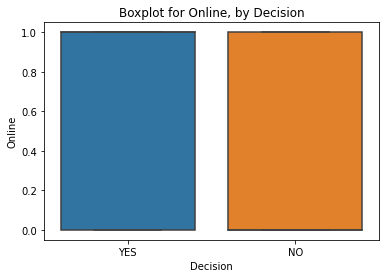

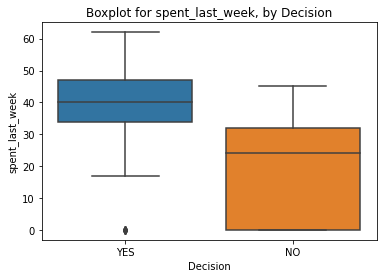

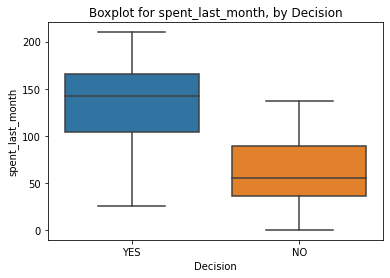

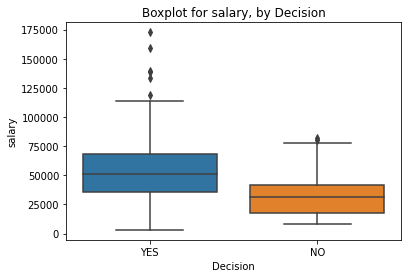

In [20]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
# for column in NoPrediction.drop(columns=['Decision']):
#   if NoPrediction[column].dtype == 'int':
#     sns.boxplot(x='Decision', y=column, data=NoPrediction);




for i, col in enumerate(NoPrediction.select_dtypes([np.int, np.float]).columns):
    plt.figure(i)
    sns.boxplot(x='Decision', y=col, data=NoPrediction)
    plt.title(f'Boxplot for {col}, by Decision')

Can you admissibly conclude anything from this boxplot? Write your answer here:



The boxplots don't show anyting conclusive. 

However, there are a moderately strong observed effect in `spent_last_month`, `spent_last_week`, and `salary`. 

There is at least a moderate effect found in `Age`, `Distance`, `spent_last_month`, `spent_last_week`, and `salary`. The median for the 'YES' group lies outside the interquartile range of the 'NO' group. 

A subset of these features--`spent_last_month` and `spent_last_week`-- have a stronger observed effect. For these, the entire IQR of the 'YES' group lies outside the IQR of the 'NO' group.

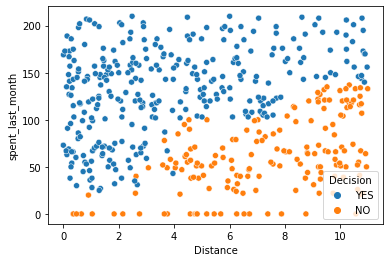

In [21]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='Distance', y='spent_last_month', data=NoPrediction, hue='Decision');

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

We can conclude that if `Distance > 6` and `spent_last_month < 80`, the `Decision` is likely to be 'NO'.

We can also conclude that if `Distance < 7.5` and `spent_last_month > 110 `, the `Decision` is likely to be 'YES'.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [22]:
# Get just those rows whose value for the Decision column is null  
Prediction = coffeeData[coffeeData['Decision'].isna()]
Prediction

,Age,Gender,num_coffeeBags_per_year,Distance,Online,Decision,spent_last_week,spent_last_month,salary
1,24,Male,0,0.520906,0,NaN,44,164,74035
3,20,Male,0,0.932098,1,NaN,30,107,13166
7,24,Female,0,1.193188,0,NaN,20,34,17425
11,24,Female,0,1.655096,1,NaN,40,153,84803
12,21,Female,0,1.714179,1,NaN,38,122,42338
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,5.984716,0,NaN,0,52,55227
677,67,Male,5,6.288700,1,NaN,41,151,182058
680,24,Female,5,6.583449,1,NaN,62,205,55772
682,33,Female,5,6.723241,0,NaN,34,96,78058


In [23]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,Distance,Online,spent_last_week,spent_last_month,salary
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,3.428836,0.570175,33.394737,110.407895,41923.741228
std,14.302293,1.585514,2.153102,0.496140,15.697930,53.786536,27406.768360
min,16.000000,0.000000,0.010048,0.000000,0.000000,0.000000,1617.000000
25%,22.000000,2.000000,1.699408,0.000000,25.750000,65.000000,15911.500000
50%,25.000000,3.000000,3.208673,1.000000,37.000000,113.500000,40987.500000
75%,39.000000,4.000000,5.261184,1.000000,44.000000,151.250000,58537.000000
max,67.000000,5.000000,10.871566,1.000000,62.000000,210.000000,182058.000000


### 4. Divide the NOPrediction subset into X and y

In [24]:
# Check the names of the columns of NOPrediction
NoPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'Distance', 'Online',
       'Decision', 'spent_last_week', 'spent_last_month', 'salary'],
      dtype='object')

In [25]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = list(NoPrediction.drop(columns=['Decision']).columns)

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['Decision']

In [26]:
features

['Age',
 'Gender',
 'num_coffeeBags_per_year',
 'Distance',
 'Online',
 'spent_last_week',
 'spent_last_month',
 'salary']

In [27]:
X.shape, y.shape

((474, 8), (474,))

### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [28]:
# One-hot encode all features in X.

X = pd.get_dummies(X, drop_first=True)
X

,Age,num_coffeeBags_per_year,Distance,Online,spent_last_week,spent_last_month,salary,Gender_Male
0,36,0,0.003168,0,24,73,42789,0
1,24,0,0.916005,1,39,119,30563,1
2,24,0,0.965881,0,20,36,14244,0
3,20,0,1.036346,1,23,28,14293,0
4,34,0,1.134851,0,55,202,91035,0
...,...,...,...,...,...,...,...,...
469,29,5,10.455068,0,20,74,29799,0
470,45,5,10.476341,0,61,201,80260,0
471,54,5,10.693889,1,44,116,44077,1
472,63,5,10.755194,1,33,117,43081,1


In [29]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=246)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((355, 8), (119, 8), (355,), (119,))

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [50]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion='entropy')

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

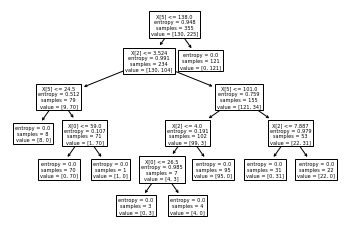

In [51]:
# Now we want to visualize the tree
entr_model_plot = tree.plot_tree(entr_model)

# We can do so with export_graphviz
entr_model_graphviz = tree.export_graphviz(entr_model)

# Alternatively for class_names use entr_model.classes_
entr_model_classes = entr_model.classes_

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [53]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "YES"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "NO"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "YES"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "NO"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score 0.9873417721518988
Precision score for "YES" 0.9873417721518988
Precision score for "NO" 1.0
Recall score 0.975609756097561
Recall score for "YES" 1.0
Recall score for "NO" 0.975609756097561


What can you infer from these results? Write your conclusions here:

The `entr_model` is 99% accurate at predicting the both decisions responses, ('YES' and 'NO'). This model scores a perfect 1.0 on Precision score for 'NO' and Recall score for 'YES'. The recall and precision are similar, showing that there are no obvious weaknesses in the model. The target variable is fairly balanced, so accuracy is as reliable metric for this model. 

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [54]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini')

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

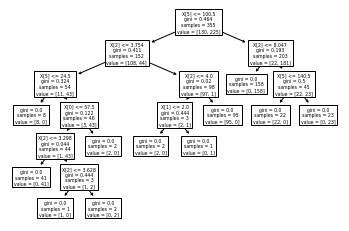

In [55]:
# As before, but make the model name gini_model
gini_model_plot =tree.plot_tree(gini_model)

# Export to graphviz
gini_model_graphviz = tree.export_graphviz(gini_model)

# Alternatively for class_names use gini_model.classes_
gini_model_classes = gini_model.classes_


In [56]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "YES"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "NO"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "YES"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "NO"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Precision score for "YES" 0.9746835443037974
Precision score for "NO" 0.975
Recall score 0.9512195121951219
Recall score for "YES" 0.9871794871794872
Recall score for "NO" 0.9512195121951219


How do the results here compare to the previous model? Write your judgements here: 

The scoring metrics are slightly worse with the gini_model. The accuracy is lower by about 1%. The gini_model has the advantage of being more computationally efficient, so, if the data set is very large, it may be worth using the gini_model over the entr_model while giving up 1% in accuracy. 

The tree looks similar in the plots. Let's compare the outputs in all formats.

In [57]:
entr_model_plot == gini_model_plot

False

In [58]:
entr_model_graphviz == gini_model_graphviz

False

Despite looking similar, the output plot and output tree are different. However, the output classes are equal, which is the reason the visual plots appear to be similar.

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [62]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)

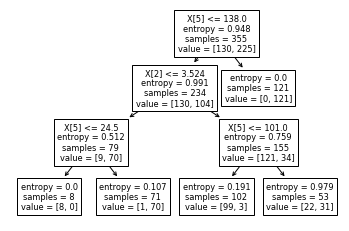

In [64]:
# As before, we need to visualize the tree to grasp its nature
entr_model2_plt = tree.plot_tree(entr_model2)
entr_model2_graphviz = tree.export_graphviz(entr_model2)

# Alternatively for class_names use entr_model2.classes_
entr_model2_classes = entr_model2.classes_

In [66]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "YES"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "NO"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "YES"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "NO"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score 0.8764044943820225
Precision score for "YES" 0.8764044943820225
Precision score for "NO" 1.0
Recall score 0.7317073170731707
Recall score for "YES" 1.0
Recall score for "NO" 0.7317073170731707


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

The entr_model2 scores worse than entr_model in every metric, but has it two advantages:

* it create a tree that is half the depth of the other plot, meaning the algorithm is easier for a human to understand,
* it is faster to compute for a machine. 

Further, the lower complexity of the model means that the model is more likely to be generalizble to new data, meaning it is more likely to perform near the same accuaracy level on new data. 

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [67]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

# Do the fit, predict, and series transformations as before. 
y_pred = gini_model2.fit(X_train, y_train).predict(X_test)

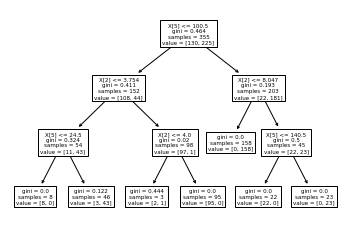

In [74]:
gini_model2_plot = tree.plot_tree(gini_model2)

# Alternatively for class_names use gini_model2.classes_
gini_model2_classes = gini_model2.classes_

In [75]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

This model is the best so far becuase it is both simple and accurate. While the entropy models lost a lot of accuracy from being constrained to a depth of 3, the gini model managed to be almost as accurate as the gini model with no constraints on depth. By being a simple model, this accuracy is more likely to be generalizable.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [76]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData['Decision'].value_counts()

YES    303
NO     171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [80]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = list(coffeeData.drop(columns='Decision'))

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]
new_X

,Age,Gender,num_coffeeBags_per_year,Distance,Online,spent_last_week,spent_last_month,salary
1,24,Male,0,0.520906,0,44,164,74035
3,20,Male,0,0.932098,1,30,107,13166
7,24,Female,0,1.193188,0,20,34,17425
11,24,Female,0,1.655096,1,40,153,84803
12,21,Female,0,1.714179,1,38,122,42338
...,...,...,...,...,...,...,...,...
673,66,Female,5,5.984716,0,0,52,55227
677,67,Male,5,6.288700,1,41,151,182058
680,24,Female,5,6.583449,1,62,205,55772
682,33,Female,5,6.723241,0,34,96,78058


In [87]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X, drop_first=True)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)
potential_buyers

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
  

In [103]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183]))

In [123]:
modeled_decision = pd.Series(potential_buyers).value_counts()
modeled_decision

YES    183
NO      45
dtype: int64

The total number of potential buyers is 303 + 183 = 486

In [125]:
# Print the total number of surveyed people 
n_surveyed = len(coffeeData)
n_surveyed

702

In [126]:
# Let's calculate the proportion of buyers
n_answered_yes = coffeeData['Decision'].value_counts()['YES']
n_modeled_yes =  modeled_decision['YES']

n_buyers = n_answered_yes + n_modeled_yes

proportion_of_buyers = n_buyers / n_surveyed 
proportion_of_buyers

0.6923076923076923

In [127]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print(f"The percentage of people who want to buy the Hidden Farm coffee is modeled to be {100*proportion_of_buyers:0.1f}%")

The percentage of people who want to buy the Hidden Farm coffee is modeled to be 69.2%


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [ ]:
# Plug in appropriate max_depth and random_state parameters 
_ _ _ 

# Model and fit
_ _ _ 




### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 